# Ejercicio:

- Configure el entorno de Colab para trabajar con GPU (Ver pestaña entorno de ejecución). Repita el entrenamiento del modelo de clasificación Fashion mnist para batch size en 32, 64, 128, 256, y 512. Reporte una tabla con los rendimientos sobre el conjunto de test y el tiempo promedio de cómputo por época.

- Repita el procedimiento del punto anterior configurando Colab para trabajar con TPU.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.18.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist #cargar fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

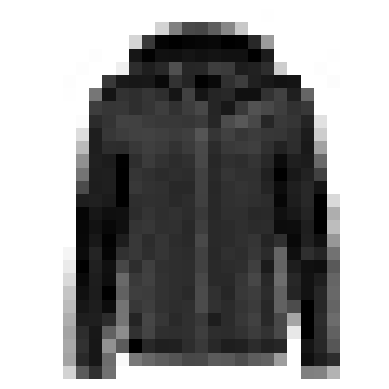

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

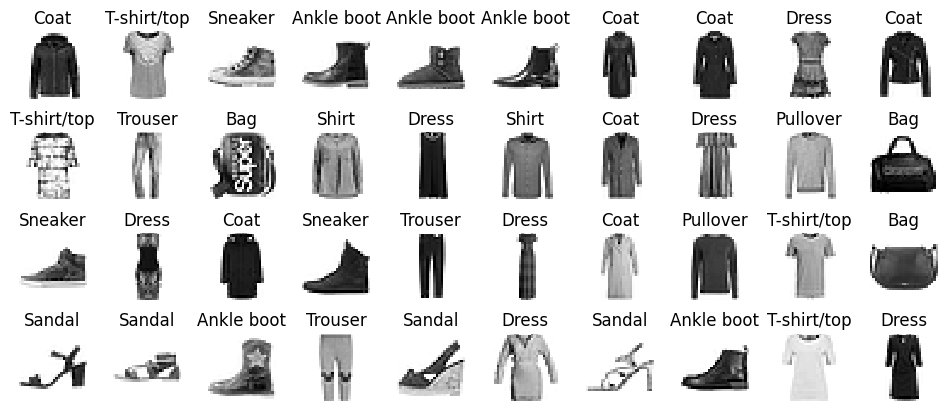

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Crear el modelo

In [14]:
import numpy as np

In [15]:
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)

In [16]:
import time
import pandas as pd

def build_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ])
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="sgd",
        metrics=["accuracy"]
    )
    return model

# Lista de batch sizes a evaluar
batch_sizes = [32, 64, 128, 256, 512]

results = []

for batch_size in batch_sizes:
    print(f"Entrenando con batch_size={batch_size}")

    # Crear y compilar el modelo desde cero para cada experimento
    model = build_model()
    # Registrar tiempo de entrenamiento
    start = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=batch_size,
        validation_data=(X_valid, y_valid),
        verbose=0  # Cambia a 1 si quieres ver el progreso
    )
    end = time.time()
    tiempo_total = end - start
    tiempo_por_epoca = tiempo_total / 10  # 10 épocas

    # Evaluar en el conjunto de test
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    # Guardar resultados
    results.append({
        "batch_size": batch_size,
        "accuracy_test": test_acc,
        "tiempo_promedio_epoca_seg": tiempo_por_epoca
    })
    print(f"batch_size={batch_size}: accuracy={test_acc:.4f}, tiempo/época={tiempo_por_epoca:.2f} seg")

# Mostrar tabla de resultados
df_results = pd.DataFrame(results)
print("\nResultados finales:")
print(df_results)

Entrenando con batch_size=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


batch_size=32: accuracy=0.8603, tiempo/época=4.95 seg
Entrenando con batch_size=64
batch_size=64: accuracy=0.8391, tiempo/época=2.52 seg
Entrenando con batch_size=128
batch_size=128: accuracy=0.8396, tiempo/época=1.47 seg
Entrenando con batch_size=256
batch_size=256: accuracy=0.8245, tiempo/época=0.91 seg
Entrenando con batch_size=512
batch_size=512: accuracy=0.8015, tiempo/época=0.75 seg

Resultados finales:
   batch_size  accuracy_test  tiempo_promedio_epoca_seg
0          32         0.8603                   4.949573
1          64         0.8391                   2.519297
2         128         0.8396                   1.466075
3         256         0.8245                   0.906067
4         512         0.8015                   0.754515
